In [215]:
import numpy as np
import pandas as pd
import statistics
import random
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [207]:
num_of_iterations = [50,100,150,200,250,300,400,500,800,1000]
# val_of_alpha = [0.001, 0.003, 0.005, 0.008, 0.01, 0.05]
final_mse_for_theta = []
final_mse_for_alpha = []

In [221]:

class Airfoil:
    mean_std = list()
    theta_val = None
    alpha = 0.005
    iterations = 1000
    
    def find_mean_std(self,train_data_frm):
        for cols in range(len(train_data_frm.columns)-1):
            col = train_data_frm.iloc[:,cols]
            mean_val = statistics.mean(col)
            std_val = statistics.stdev(col)
            self.mean_std.append([mean_val,std_val])
        
   
    def preproccess_data(self,train_data_frm):
        for i in range(len(self.mean_std)):
            train_data_frm[i] = (train_data_frm[i]-self.mean_std[i][0])/self.mean_std[i][1]
        return train_data_frm
    
      
    
    def train_validation_split(self,data_frm,validation_data_size):
       
        if isinstance(validation_data_size, float):
            validation_data_size=round(validation_data_size * len(data_frm))
        indices=data_frm.index.tolist()
        valid_indices=random.sample(indices, validation_data_size)
        valid_datafrm=data_frm.loc[valid_indices]
        train_datafrm=data_frm.drop(valid_indices)
        return train_datafrm, valid_datafrm
    
        
    def run_gradient_descent(self,train_data_frm):
        X_data = train_data_frm.iloc[:,:-1].values
        Y_data = train_data_frm.iloc[:,-1].values
        rows, cols = X_data.shape
        X_data = np.c_[np.ones(rows),X_data]
#         self.theta_val = np.zeros(X_data.shape[1])
#         self.theta_val = np.random.rand(X_data.shape[1]) 
        self.theta_val = np.empty(X_data.shape[1])
        self.theta_val.fill(0)
        for i in range(self.iterations):
            h = X_data.dot(self.theta_val)
            loss_val = h - Y_data
            gradient = ((X_data.T.dot(loss_val))/X_data.shape[0])
            self.theta_val = self.theta_val - self.alpha * gradient
    
    
    def check_validation_data(self,validation_data_frm):
        actual_data = validation_data_frm.iloc[:,-1].values
        x_data = validation_data_frm.iloc[:,:-1].values
        x_data = np.c_[np.ones(x_data.shape[0]),x_data]
        predicted_data = x_data.dot(self.theta_val)
#         val = mean_squared_error(actual_data, predicted_data)
#         mean_sq_error_it.append()
        return actual_data, predicted_data
        
    
    def train(self,train_path):
        train_data_frm = pd.read_csv(train_path, header=None)
        self.find_mean_std(train_data_frm)
        train_data_frm = self.preproccess_data(train_data_frm)
        random.seed(0)
        train_data_frm, validation_data_frm = self.train_validation_split(train_data_frm, validation_data_size = 0.2)
#         li = []
#         for it in num_of_iterations:
#             self.iterations = it
        self.run_gradient_descent(train_data_frm)
        actual_data, predicted_data = self.check_validation_data(validation_data_frm)
#             li.append(mean_squared_error(actual_data, predicted_data))
#         final_mse_for_theta.append(li)
        return actual_data, predicted_data

        
    def predict(self,test_path):
        test_data_frm = pd.read_csv(test_path, header=None)
        test_data = self.preproccess_data(test_data_frm).values
        test_data = np.c_[np.ones(test_data.shape[0]),test_data]
        predict_values = test_data.dot(self.theta_val)
        return predict_values
        
        

    


In [222]:
model3 = Airfoil()
actual_data, predicted_data = model3.train('/home/jyoti/Documents/SMAI/assign2/Q3/airfoil.csv')
# print(actual_data)
# print(predicted_data)
# print(actual_data)
# print(predicted_data)
# print(final_mse_for_theta)
# print(r2_score())

### Graph of Number of Iterations vs Mean Squared Error for different values of theta

Text(0.5, 1.0, 'Number of Iterations vs Mean Squared Error')

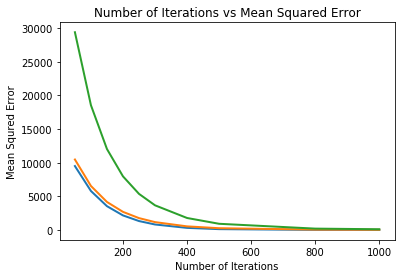

In [199]:
plt.plot(num_of_iterations,final_mse_for_theta[0], linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_theta[1],  linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_theta[2], linewidth=2, markersize=12)
plt.xlabel('Number of Iterations') 
plt.ylabel('Mean Squred Error') 
plt.title('Number of Iterations vs Mean Squared Error') 


### Graph of Number of Iterations vs Mean Squared Error for different values of alpha

Text(0.5, 1.0, 'Number of Iterations vs Mean Squared Error')

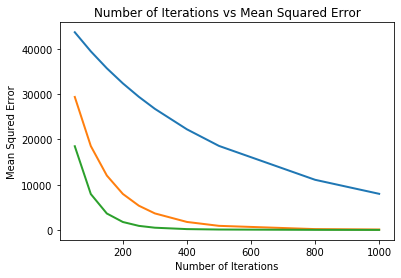

In [188]:
plt.plot(num_of_iterations,final_mse_for_alpha[0], linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_alpha[1],  linewidth=2, markersize=12)
plt.plot(num_of_iterations,final_mse_for_alpha[2], linewidth=2, markersize=12)
plt.xlabel('Number of Iterations') 
plt.ylabel('Mean Squred Error') 
plt.title('Number of Iterations vs Mean Squared Error')

## Performance Metrics

### 1. Mean Squared Error

In [214]:
print("Mean Squared Error = ",mean_squared_error(actual_data, predicted_data))

Mean Squared Error =  27.488311066679564


### 2. R2 Score

In [213]:
print("R2 Error = ",r2_score(actual_data, predicted_data))

R2 Error =  0.440679823882117


### 3. Mean Absolute Error

In [216]:
print("Mean Absolute Error = ",mean_absolute_error(actual_data, predicted_data))

Mean Absolute Error =  4.145080003831089


### Approach in different situations

#### 1. When 0-0.5% values are missing :
    Better to replace missing continous values with mean and categorical values with mode.However, if it is to be applied limited to small dataset it is better to eliminate the entire case.
#### 2. When 8-10% values are missing :
    Depending upon the criticality of feature either replace the value by mean for continous values and by mode for categorical data, or drop the corresponding rows or drop the feature itself using PCA.
#### 3. When 60-70% values are missing :
    Better to drop the feature, since most of the values are missing replacing them would lead to incorrect results.